<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/Copy_of_Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import datetime
import keras
print(datetime.datetime.now())

Using TensorFlow backend.


2019-09-05 16:10:52.884415


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-05 16:10:58.587290


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-09-05 16:11:04.274583


(60000, 28, 28)
2019-09-05 16:11:07.325614


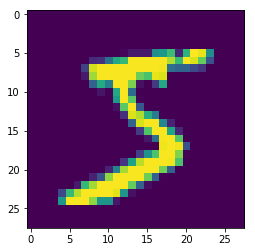

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-05 16:11:11.937954


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-05 16:11:14.649605


In [0]:
y_train[:10]
print(datetime.datetime.now())

2019-09-05 16:11:16.833523


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-05 16:11:18.835345


In [0]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-05 16:11:24.096603


In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
## MAIN BLOCK
from keras.layers import Concatenate, Dense, Input, Conv2D
from keras.layers import Activation
#model = Sequential()
img_rows, img_cols, img_channels = X_train.shape[1],X_train.shape[2],X_train.shape[3]

x1= Input(shape=(img_rows, img_cols,img_channels))
x2 = Conv2D(62, (3,3), strides=(1,1), padding='same', activation='relu', name='conv_1', use_bias=False)(x1)
x3 = keras.layers.concatenate([x1, x2])
x3 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', name='conv_2', use_bias=False)(x3)
x4 = MaxPooling2D(pool_size=(2, 2))(x3)
x5 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', name='conv_3', use_bias=False)(x4)
x6 = keras.layers.concatenate([x4, x5])
x6 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', name='conv_4', use_bias=False)(x6)
x7 = keras.layers.concatenate([x4, x5, x6])
x7 = Conv2D(64, (3,3), strides=(1,1), padding='same',activation='relu', name='conv_5', use_bias=False)(x7)
x8 = MaxPooling2D(pool_size=(2, 2))(x7)
x9 = Conv2D(32, (3,3), strides=(1,1), padding='same',activation='relu', name='conv_6', use_bias=False)(x8)
x10 = keras.layers.concatenate([x8, x9])
x10 = Conv2D(64, (3,3), strides=(1,1), padding='same',activation='relu', name='conv_7', use_bias=False)(x10)
x11 = keras.layers.concatenate([x8, x9, x10])
x11 = Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', name='conv_8', use_bias=False)(x11)
x12 = Flatten()(x11)
x13 = Dense(10, activation='softmax')(x12)
 
#model.add(Convolution2D(32, 1, 1, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

print(datetime.datetime.now())

2019-09-05 16:17:08.878569


In [0]:
from keras.models import Model
model = Model(inputs=[x1], outputs=[x13])
model.summary()

print(datetime.datetime.now())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 28, 28, 62)   558         input_5[0][0]                    
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 28, 28, 63)   0           input_5[0][0]                    
                                                                 conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 28, 28, 32)   18144       concatenate_6[0][0]        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0905 16:17:19.504103 140296848541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 16:17:19.539910 140296848541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



2019-09-05 16:17:19.560923


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0905 16:17:23.313083 140296848541568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 16:17:23.447706 140296848541568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.1036 - acc: 0.9675
Epoch 2/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0382 - acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.0275 - acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0225 - acc: 0.9925
Epoch 5/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0173 - acc: 0.9944
Epoch 6/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.0141 - acc: 0.9957
Epoch 7/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0127 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0099 - acc: 0.9966
Epoch 9/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0110 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 33s 543us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-05 16:23:28.516795


In [0]:
print(score)
print(datetime.datetime.now())

[0.04138632849849814, 0.9908]
2019-09-05 16:23:31.257287
